In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
counts = np.loadtxt('data/txtdata.csv')

In [3]:
counts

array([13., 24.,  8., 24.,  7., 35., 14., 11., 15., 11., 22., 22., 11.,
       57., 11., 19., 29.,  6., 19., 12., 22., 12., 18., 72., 32.,  9.,
        7., 13., 19., 23., 27., 20.,  6., 17., 13., 10., 14.,  6., 16.,
       15.,  7.,  2., 15., 15., 19., 70., 49.,  7., 53., 22., 21., 31.,
       19., 11., 18., 20., 12., 35., 17., 23., 17.,  4.,  2., 31., 30.,
       13., 27.,  0., 39., 37.,  5., 14., 13., 22.])

<BarContainer object of 74 artists>

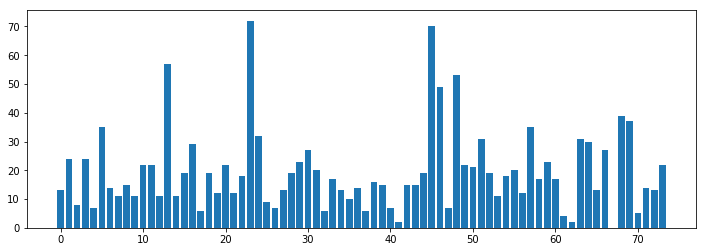

In [4]:
ncounts = len(counts)
plt.figure(figsize=(12,4))
plt.bar(np.arange(ncounts), counts)

In [5]:
import pymc as pm

In [6]:
alpha = 1.0/counts.mean()

In [7]:
counts.mean()

19.743243243243242

In [8]:
alpha

0.05065023956194388

In [9]:
lam1 = pm.Exponential('lam1', alpha)
lam2 = pm.Exponential('lam2', alpha)

In [10]:
print lam1.random(), lam2.random()

2.344585814518032 1.9455558063914922


In [11]:
tau = pm.DiscreteUniform('tau', 0, ncounts)

In [12]:
print tau.random(), tau.random()

67 5


# Test

Dummy run before function setup

In [13]:
ncounts

74

In [14]:
out = np.zeros(ncounts)

In [15]:
out

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [16]:
tl1 = float(lam1.random())
tl2 = float(lam2.random())
ttau = int(tau.random())

In [17]:
tl1

15.808276851452032

In [18]:
tl2

43.22064286411755

In [19]:
ttau

55

In [20]:
out[:ttau] = tl1

In [21]:
out[ttau:] = tl2

In [22]:
out

array([15.80827685, 15.80827685, 15.80827685, 15.80827685, 15.80827685,
       15.80827685, 15.80827685, 15.80827685, 15.80827685, 15.80827685,
       15.80827685, 15.80827685, 15.80827685, 15.80827685, 15.80827685,
       15.80827685, 15.80827685, 15.80827685, 15.80827685, 15.80827685,
       15.80827685, 15.80827685, 15.80827685, 15.80827685, 15.80827685,
       15.80827685, 15.80827685, 15.80827685, 15.80827685, 15.80827685,
       15.80827685, 15.80827685, 15.80827685, 15.80827685, 15.80827685,
       15.80827685, 15.80827685, 15.80827685, 15.80827685, 15.80827685,
       15.80827685, 15.80827685, 15.80827685, 15.80827685, 15.80827685,
       15.80827685, 15.80827685, 15.80827685, 15.80827685, 15.80827685,
       15.80827685, 15.80827685, 15.80827685, 15.80827685, 15.80827685,
       43.22064286, 43.22064286, 43.22064286, 43.22064286, 43.22064286,
       43.22064286, 43.22064286, 43.22064286, 43.22064286, 43.22064286,
       43.22064286, 43.22064286, 43.22064286, 43.22064286, 43.22

Since we pass in 74 different lambdas, it will calculate a var with each

In [23]:
temp = pm.Poisson('obs', out)

In [24]:
final = temp.random()

In [25]:
final

array([19, 19, 14, 14, 26, 17, 17, 19, 12, 13, 14, 12, 12, 14, 11, 11, 13,
       15, 14, 27, 12, 17, 17, 15, 16, 22, 21,  8, 14, 16, 19, 14, 24, 20,
       13, 15, 21, 12,  7, 19, 10, 13, 15, 18, 18,  9, 16, 21, 15, 15, 24,
       16, 14, 23, 20, 37, 49, 31, 38, 41, 47, 49, 41, 33, 37, 43, 43, 38,
       44, 41, 34, 49, 44, 41])

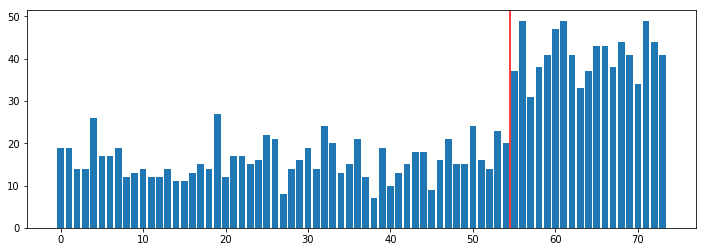

In [26]:
nfinal = len(final)
plt.figure(figsize=(12,4))
plt.bar(np.arange(nfinal), final)
plt.axvline(ttau - 0.5, color='red')

# Real run

In [27]:
@pm.deterministic
def lambda_(tau=tau, lambda_1=lam1, lambda_2=lam2):
    out = np.zeros(ncounts)
    out[:tau] = lambda_1  # lambda before tau is lambda1
    out[tau:] = lambda_2  # lambda after (and including) tau is lambda2
    return out

In [28]:
observation = pm.Poisson("obs", lambda_, value=counts, observed=True)

model = pm.Model([observation, lam1, lam2, tau])

In [29]:
# Mysterious code to be explained in Chapter 3.
mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000, 1)

 [-----------------100%-----------------] 40000 of 40000 complete in 9.6 sec

In [30]:
lam1samp = mcmc.trace('lam1')[:]
lam2samp = mcmc.trace('lam2')[:]
tausamp = mcmc.trace('tau')[:]

(array([1.42857143e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.85714286e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.28571429e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.54571429e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.69571429e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.57114286e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.08300000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.42857143e-04]),
 array([39.        , 39.23333333, 39.46666667, 39.7       , 39.93333333,
        40.16666667, 40.4       , 40.63333333, 40.86666667, 41.1       ,
        41.33333333, 41.56666667, 41.8       , 42.03333333, 42.26666667,
        42.5       , 42.73333333, 42.96666667, 43.2       , 43.43333333,
        43.66666667, 43.9       , 44.13333333, 44.36666667, 44.6       ,
        44.83333333, 45.06666667, 45.3       , 45.53333333, 45.76666667,
        46.     

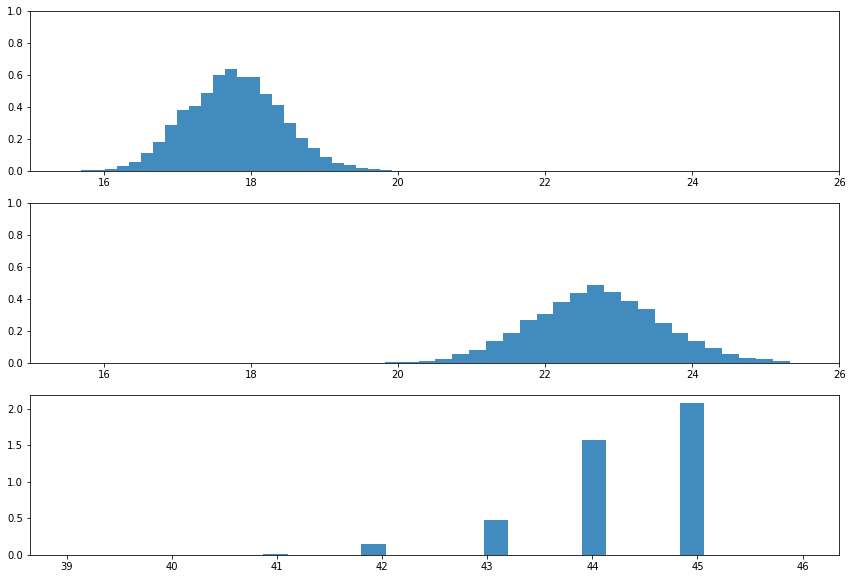

In [32]:
plt.figure(figsize=(14.5, 10))

ax = plt.subplot(311)
plt.hist(lam1samp, bins=30, alpha=0.85, density=True)
plt.xlim([15,26])
plt.ylim([0,1])

ax = plt.subplot(312)
plt.hist(lam2samp, bins=30, alpha=0.85, density=True)
plt.xlim([15,26])
plt.ylim([0,1])

ax = plt.subplot(313)
plt.hist(tausamp, bins=30, alpha=0.85, density=True)